C:\Users\MANOJ KUMAR T\AppData\Local\Temp\ipykernel_7744\2716290838.py:9: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


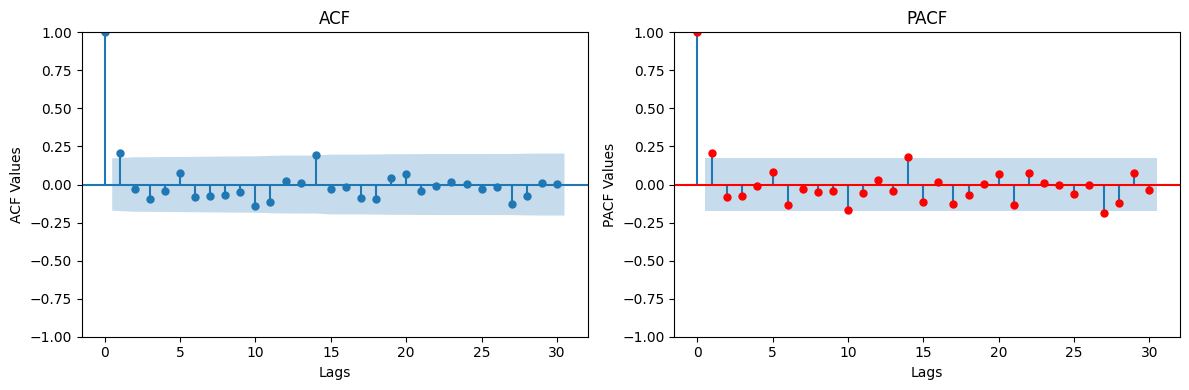

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load dataset
df = pd.read_csv("ML471_S3_Datafile_Practice.csv")

# Date preprocessing
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Drop unnecessary derived features
df.drop(columns=["SMA_10", "SMA_30", "SES"], errors="ignore", inplace=True)

# Handle missing values
df.dropna(inplace=True)

# Differenced closing price
close_diff = df["Close"].diff().dropna()

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(close_diff, lags=30, ax=axes[0])
axes[0].set_title("ACF")
axes[0].set_xlabel("Lags")
axes[0].set_ylabel("ACF Values")

plot_pacf(close_diff, lags=30, ax=axes[1], method="ywm", color = 'red')
axes[1].set_title("PACF")
axes[1].set_xlabel("Lags")
axes[1].set_ylabel("PACF Values")

plt.tight_layout()
plt.show()
